In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Age', ylabel='Density'>

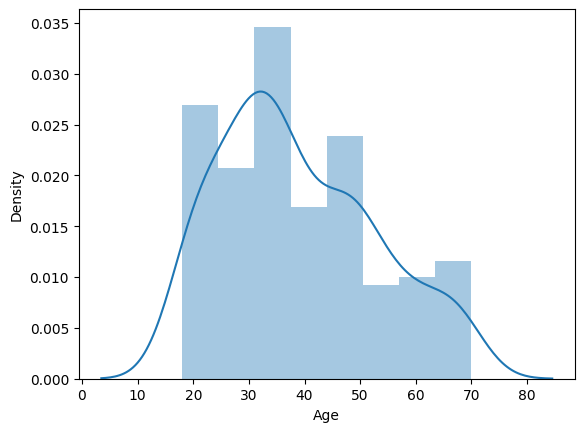

In [28]:
sns.distplot(df['Age'])

In [29]:
num_cols = df.describe(exclude='object')
col_names = num_cols.columns
col_names

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

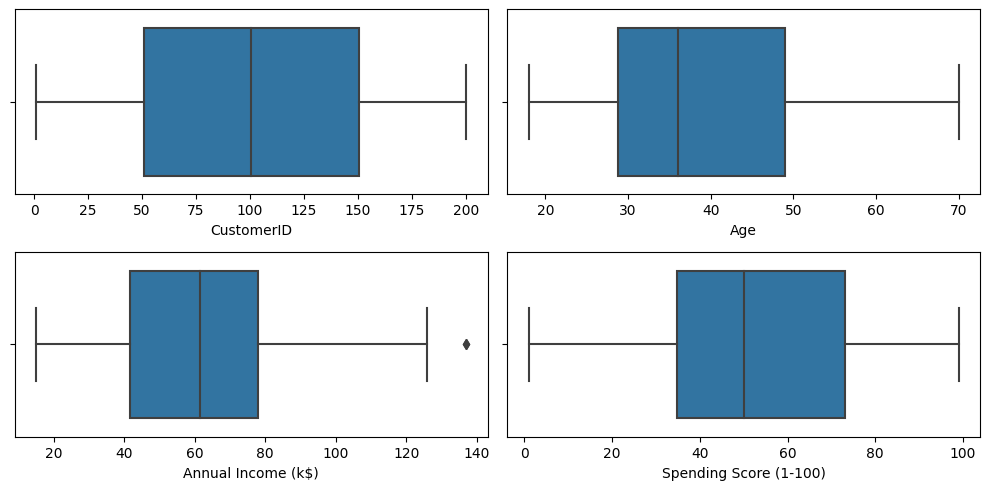

In [30]:
fig = plt.figure(figsize = (10,7))

for i in range (4):
    fig.tight_layout()
    
    grid_col = "32{}".format(i+1)
    
    ax = fig.add_subplot(int(grid_col))
    
    sns.boxplot(data=df, x=col_names[i], ax = ax)

plt.show()


In [31]:
Q1 = np.percentile(df['Annual Income (k$)'], 25)

Q3 = np.percentile(df['Annual Income (k$)'], 75)

IQR = Q3-Q1

print(IQR)

36.5


In [32]:
up = np.where(df['Annual Income (k$)'] >= (Q3+1.5*IQR))

low = np.where(df['Annual Income (k$)'] <= (Q1-1.5*IQR))

df.drop(up[0], inplace = True)
df.drop(low[0], inplace = True)

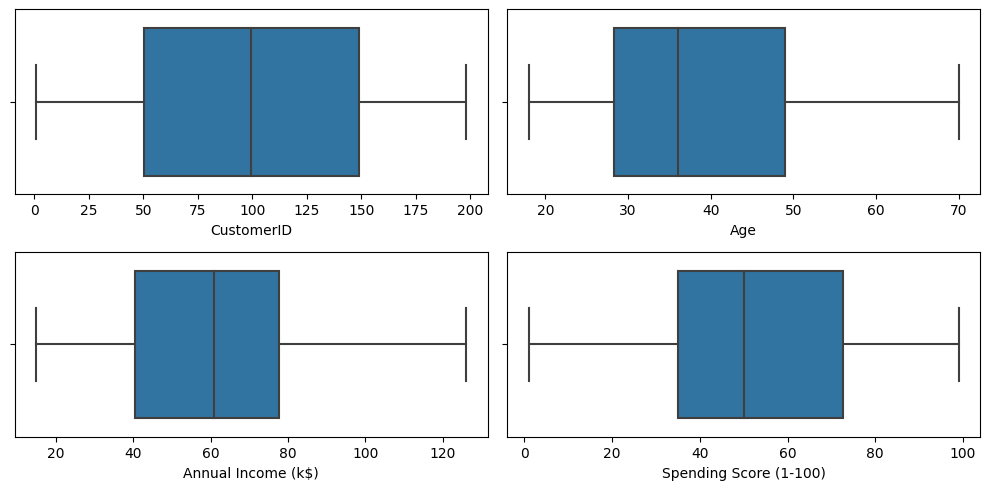

In [33]:
fig = plt.figure(figsize = (10,7))

for i in range (4):
    fig.tight_layout()
    
    grid_col = "32{}".format(i+1)
    
    ax = fig.add_subplot(int(grid_col))
    
    sns.boxplot(data=df, x=col_names[i], ax = ax)

plt.show()

In [34]:
df = df.drop(columns= ["CustomerID","Gender"], axis =1)

In [35]:
from sklearn.preprocessing import normalize

df = pd.DataFrame( normalize(df), columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.413925,0.326783,0.849635
1,0.247025,0.176446,0.952809
2,0.760286,0.608229,0.228086
3,0.280697,0.195267,0.939723
4,0.580683,0.318439,0.749269


In [36]:
df1 =df[['Age', 'Spending Score (1-100)']]

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

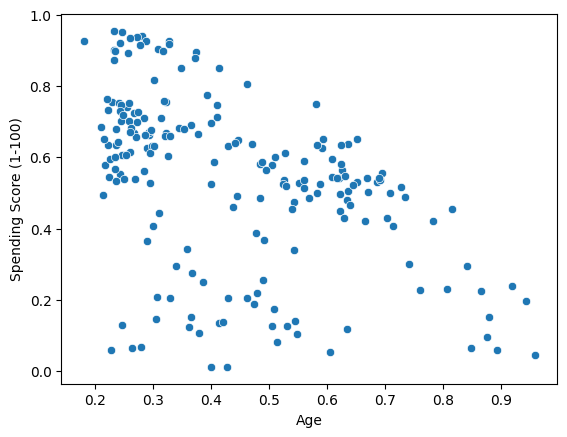

In [37]:
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'])

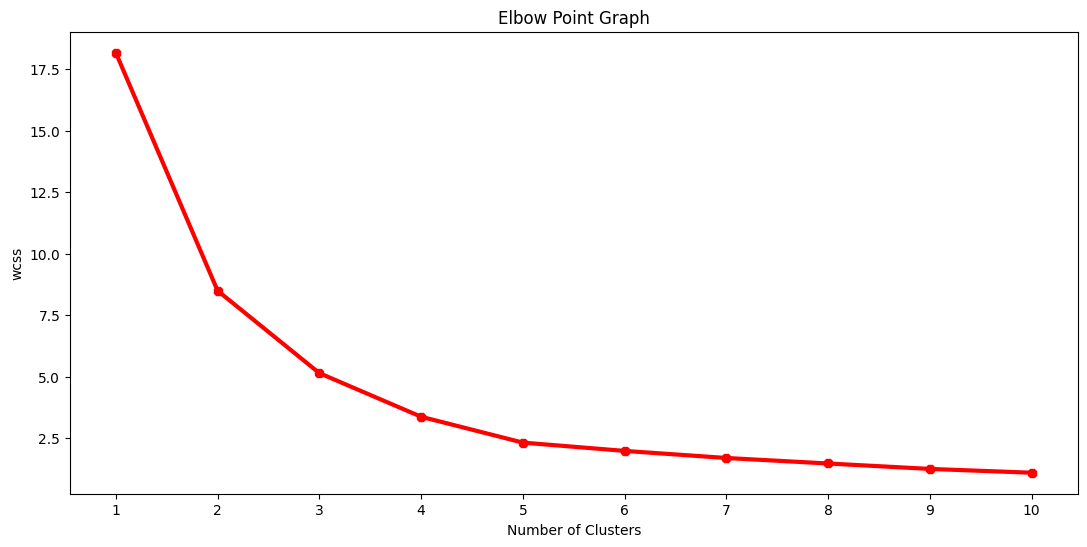

In [38]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(13,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth=3, color='red', marker='8')
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.xticks(np.arange(1,11,1))
plt.show()

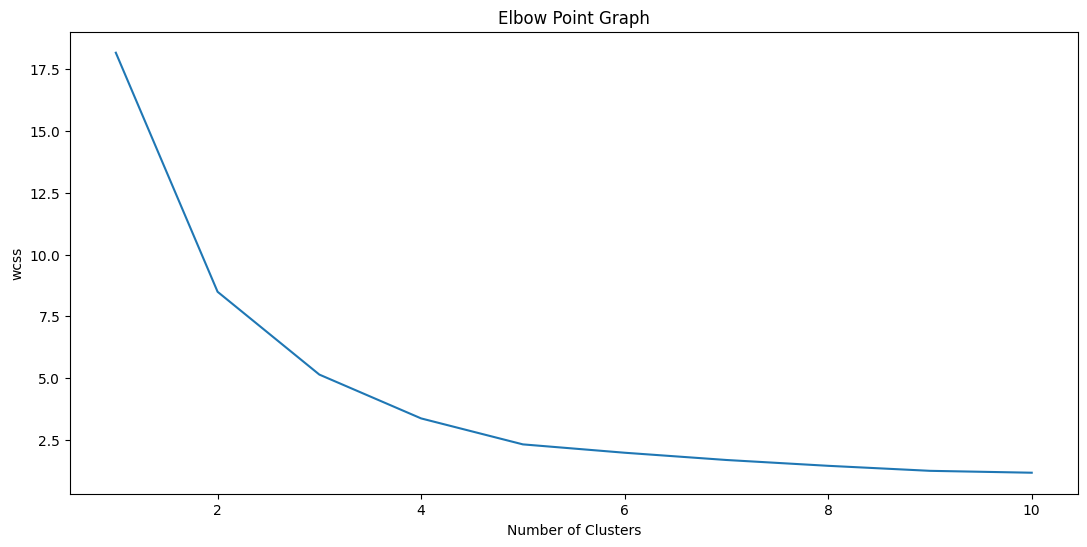

In [39]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(13,6))
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [40]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Age,Spending Score (1-100),Label
0,0.413925,0.849635,4
1,0.247025,0.952809,4
2,0.760286,0.228086,3
3,0.280697,0.939723,4
4,0.580683,0.749269,0


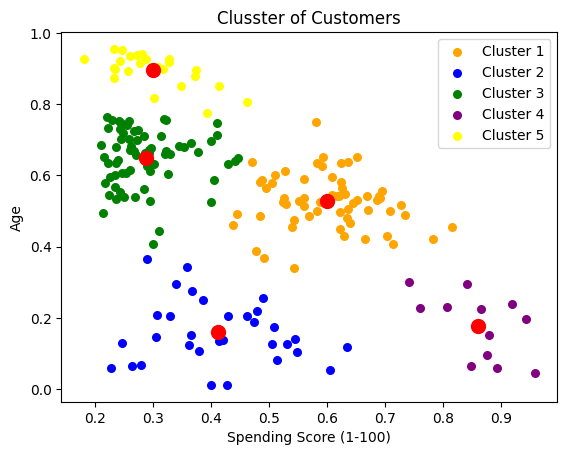

In [41]:
X=df1.values
plt.scatter(X[y==0,0], X[y==0,1], s=30, c='orange', label ='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=30, c='blue', label ='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=30, c='green', label ='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=30, c='purple', label ='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=30, c='yellow', label ='Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s=100, c='red')
plt.title('Clusster of Customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.legend()
plt.show()

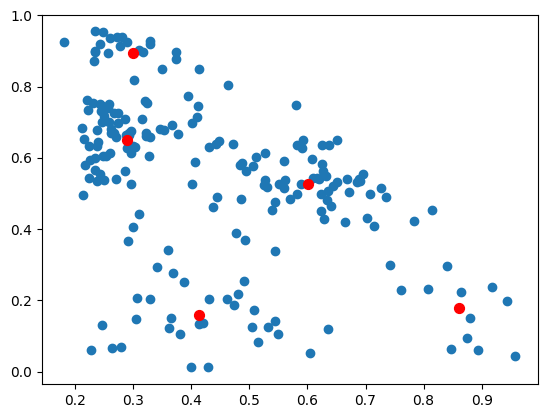

In [42]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='red')
plt.show()

In [43]:
df2 =df[['Annual Income (k$)', 'Spending Score (1-100)']]

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

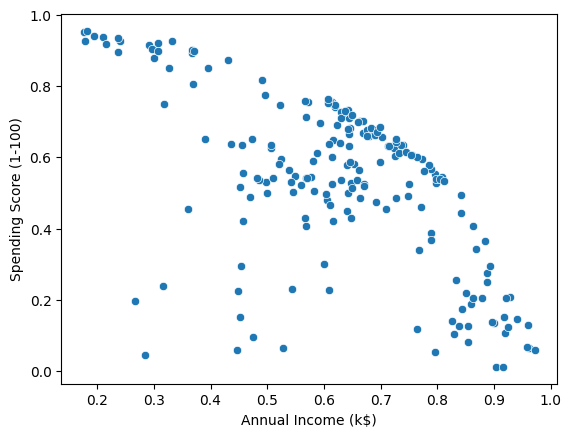

In [44]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

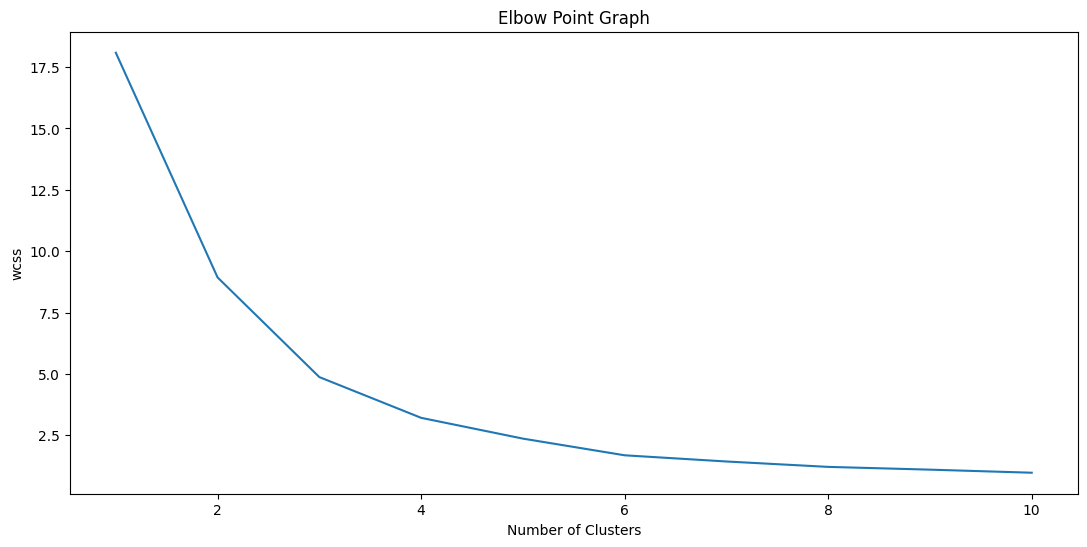

In [45]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(13,6))
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [46]:
km = KMeans(n_clusters=6)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Label
0,0.326783,0.849635,2
1,0.176446,0.952809,2
2,0.608229,0.228086,5
3,0.195267,0.939723,2
4,0.318439,0.749269,2


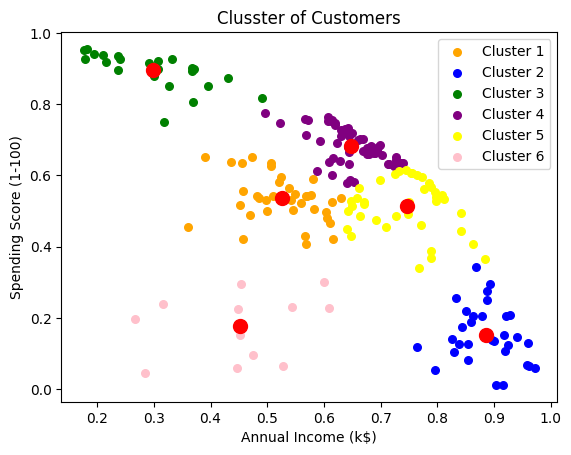

In [47]:
X=df2.values
plt.scatter(X[y==0,0], X[y==0,1], s=30, c='orange', label ='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=30, c='blue', label ='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=30, c='green', label ='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=30, c='purple', label ='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=30, c='yellow', label ='Cluster 5')
plt.scatter(X[y==5,0], X[y==5,1], s=30, c='pink', label ='Cluster 6')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s=100, c='red')
plt.title('Clusster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [48]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.413925,0.326783,0.849635
1,0.247025,0.176446,0.952809
2,0.760286,0.608229,0.228086
3,0.280697,0.195267,0.939723
4,0.580683,0.318439,0.749269


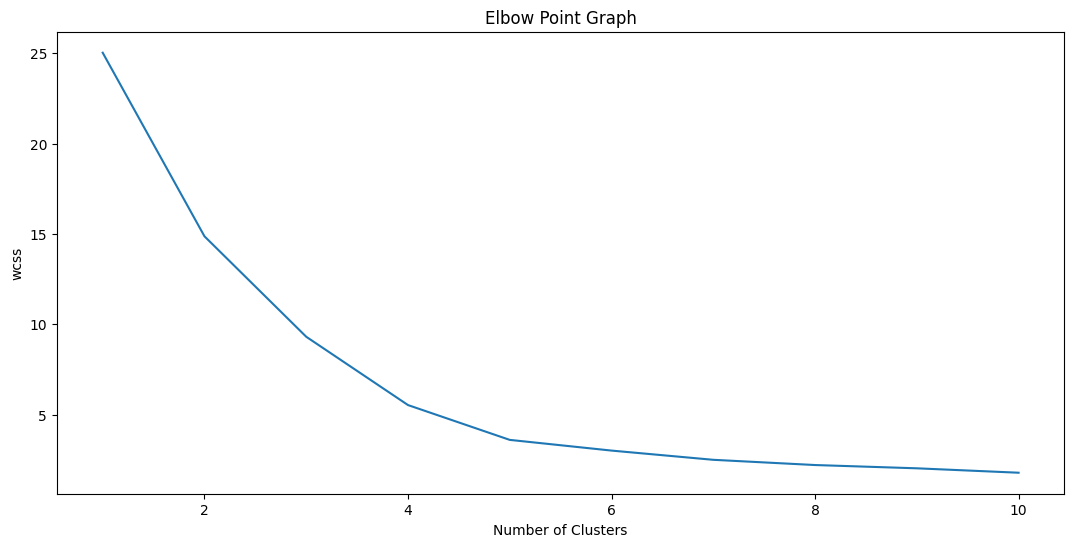

In [49]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(13,6))
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [50]:
km = KMeans(n_clusters=5)
km.fit(df)
y = km.predict(df)
df['Label'] = y
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Label
0,0.413925,0.326783,0.849635,2
1,0.247025,0.176446,0.952809,2
2,0.760286,0.608229,0.228086,4
3,0.280697,0.195267,0.939723,2
4,0.580683,0.318439,0.749269,2


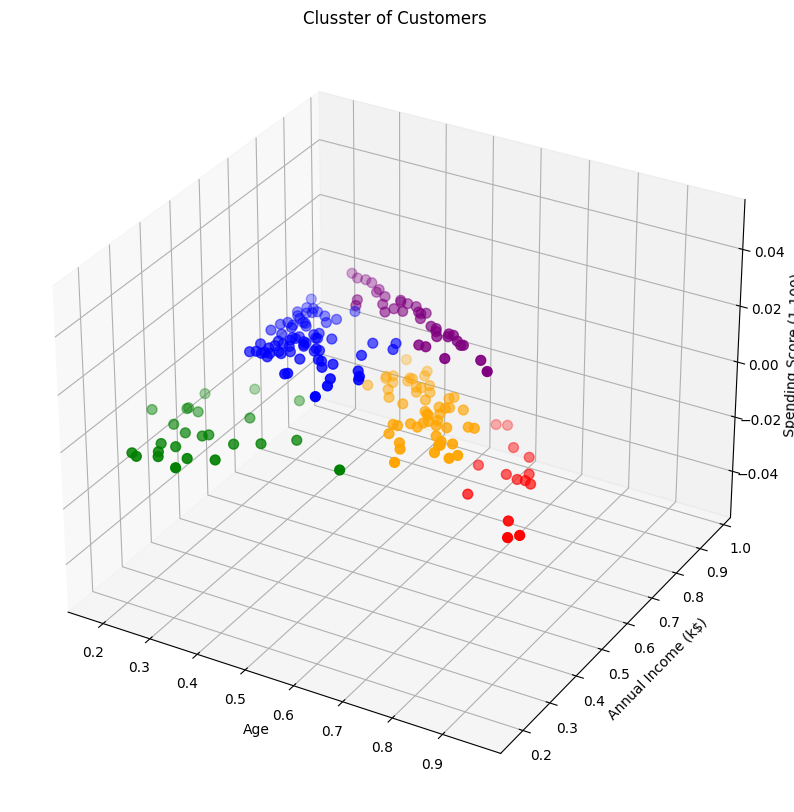

In [51]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection ='3d')

X=df.values
ax.scatter(X[y==0,0], X[y==0,1], s=50, c='orange', label ='Cluster 1')
ax.scatter(X[y==1,0], X[y==1,1], s=50, c='blue', label ='Cluster 2')
ax.scatter(X[y==2,0], X[y==2,1], s=50, c='green', label ='Cluster 3')
ax.scatter(X[y==3,0], X[y==3,1], s=50, c='purple', label ='Cluster 4')
ax.scatter(X[y==4,0], X[y==4,1], s=50, c='red', label ='Cluster 5')
plt.title('Clusster of Customers')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()
